# Astrocyte/Radial Glia

In [1]:
! pip install scanpy
! pip install scProject -U
import scProject
import scanpy as sc
patterns = sc.read_h5ad('patterns_anndata.h5ad')
dataset = sc.read_h5ad('test_target.h5ad')
dataset_filtered, patterns_filtered = scProject.matcher.filterAnnDatas(dataset, patterns, 'gene_id')

  Attempting uninstall: scProject
    Found existing installation: scProject 1.0.6
    Uninstalling scProject-1.0.6:
      Successfully uninstalled scProject-1.0.6
(55371, 428) dataset filter shape
(80, 428) patterns filter shape


Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.


Perfrom a regression with .001 weight of regularization and 1% lasso to encourage as many features to show and then we can weed them out by increasing the amount of lasso and regularization

(55371, 80)
[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


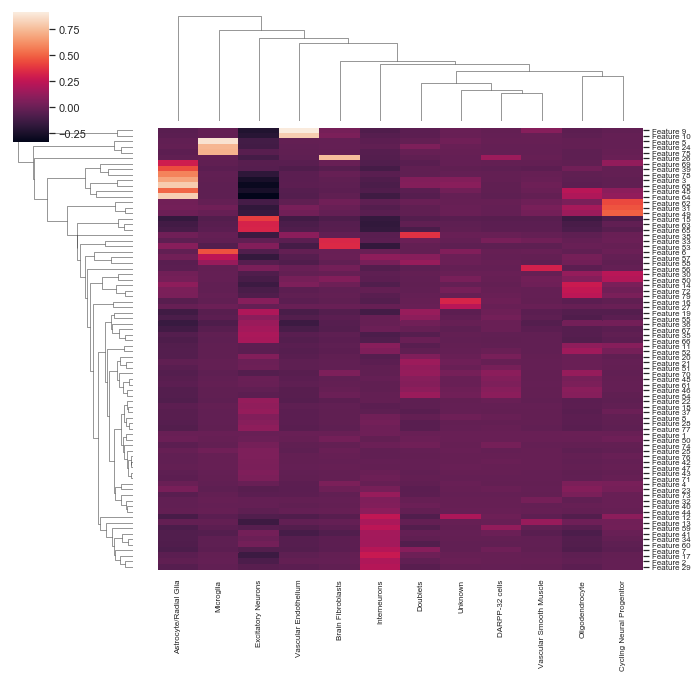

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= [10, 12]
scProject.rg.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'ARG01', .001, .01)
scProject.viz.pearsonMatrix(dataset_filtered, patterns_filtered, 'CellType', 12, 'ARG01', 'PearsARG01', True)


[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


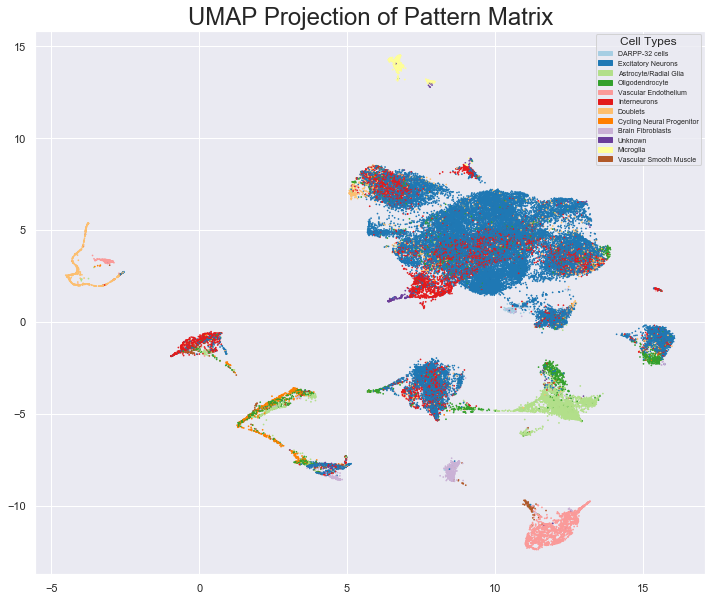

In [3]:
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.UMAP_Projection(dataset_filtered, 'CellType', 'ARG01', 'UMAPARG01', 20)

Number of nonzero cells 6405
Percentage of nonzero cells 11.567426992468983
Max coefficient 0.98015296
Average coefficient 0.023258127


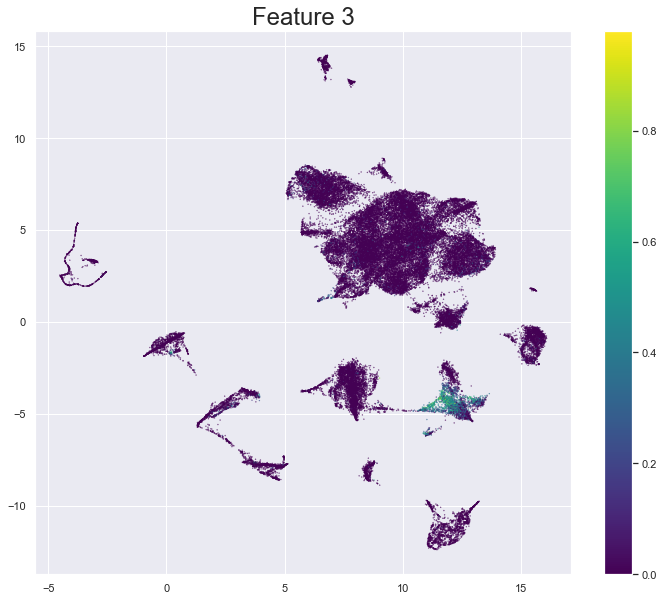

Number of nonzero cells 11055
Percentage of nonzero cells 19.96532480901555
Max coefficient 2.147391
Average coefficient 0.06725973


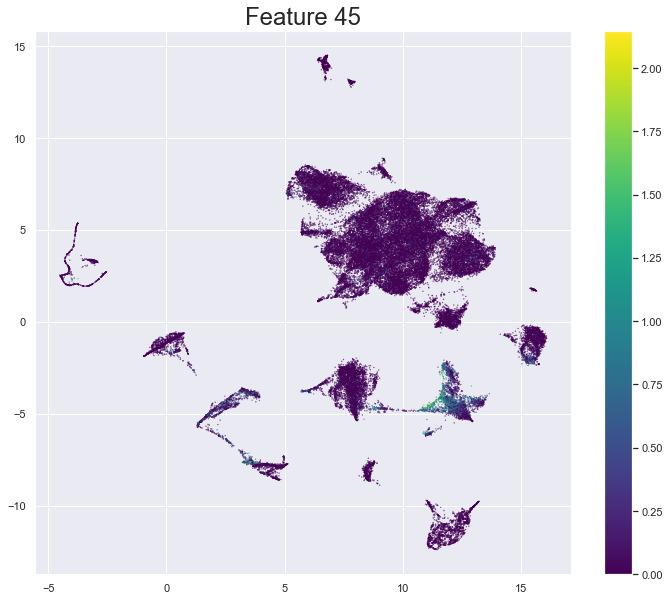

Number of nonzero cells 14651
Percentage of nonzero cells 26.45969912047823
Max coefficient 5.2612443
Average coefficient 0.14821665


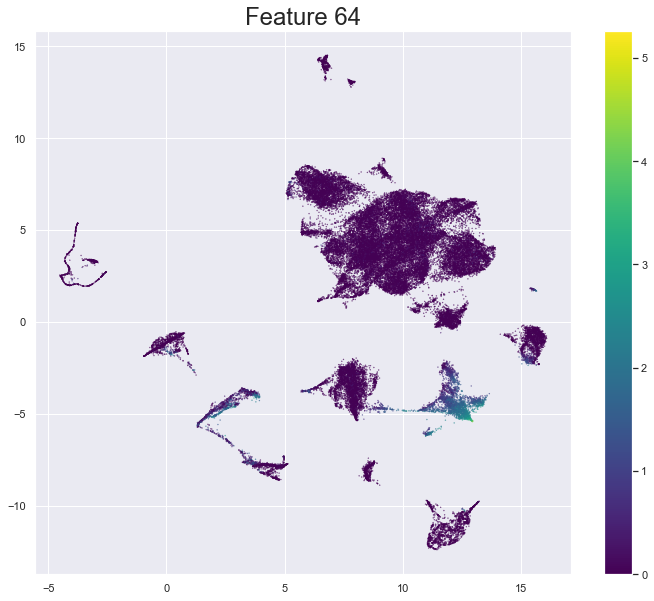

Number of nonzero cells 9673
Percentage of nonzero cells 17.4694334579473
Max coefficient 1.2885693
Average coefficient 0.053910676


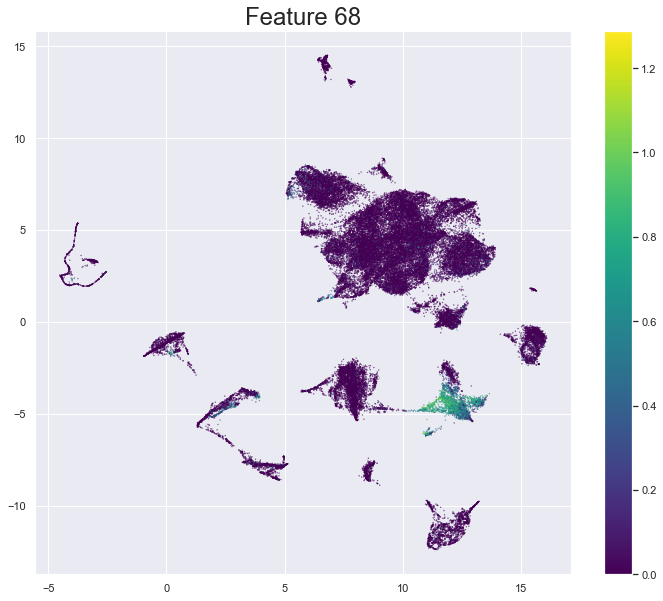

Number of nonzero cells 5059
Percentage of nonzero cells 9.136551624496578
Max coefficient 2.0710175
Average coefficient 0.035224866


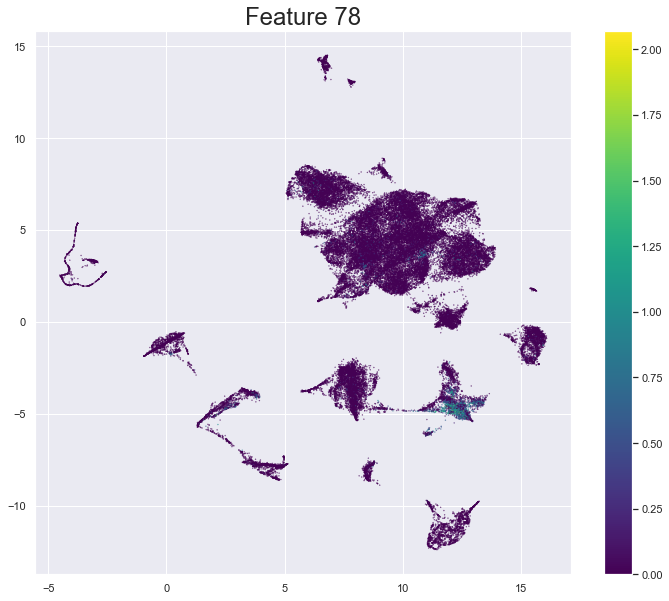

In [4]:
scProject.viz.featurePlots(dataset_filtered, [3, 45, 64, 68, 78], 'ARG01', 'UMAPARG01')

These features seem like very strong markers except for feature 78 as it also has the lowest pearson value. If we up the lasso we will be able to get a better sense of the strong features.

(55371, 80)
[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


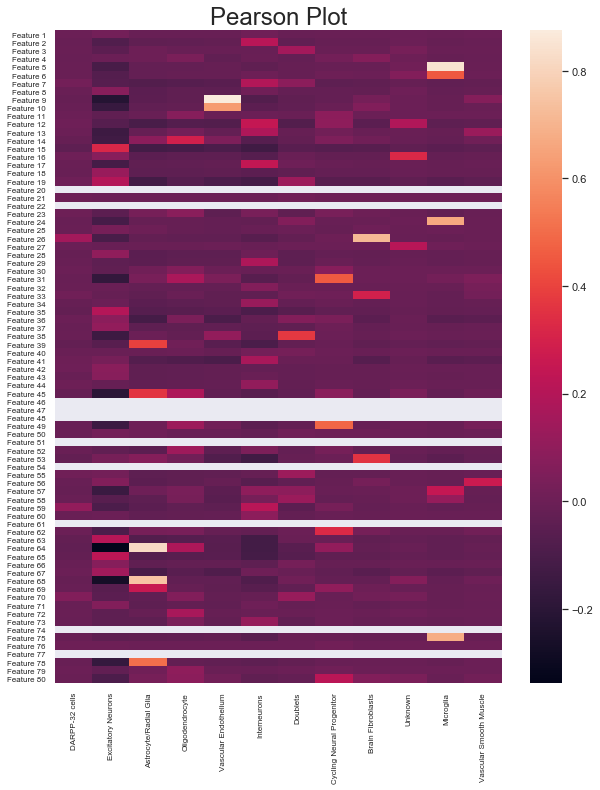

In [5]:
plt.rcParams['figure.figsize']= [10, 12]
scProject.rg.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'ARG99', .001, .99)
scProject.viz.pearsonMatrix(dataset_filtered, patterns_filtered, 'CellType', 12, 'ARG99', 'PearsARG99', True, False)


[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


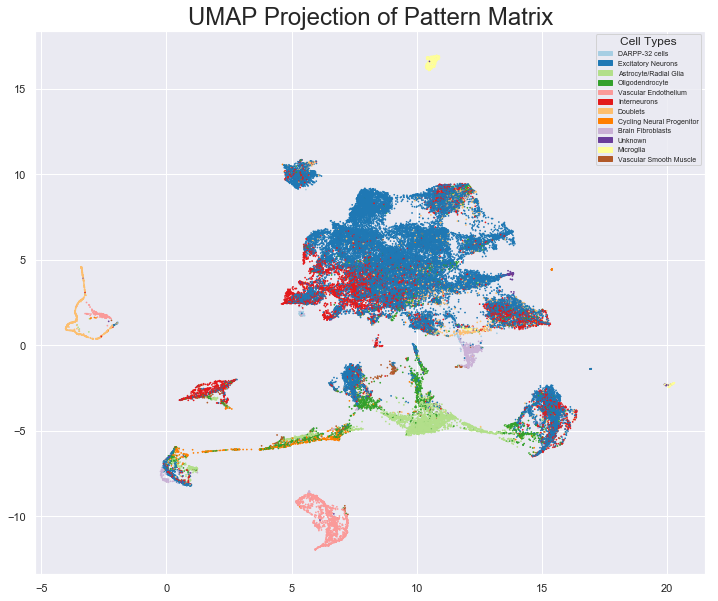

In [6]:
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.UMAP_Projection(dataset_filtered, 'CellType', 'ARG99', 'UMAPARG99', 20)

Number of nonzero cells 505
Percentage of nonzero cells 0.9120297628722617
Max coefficient 0.94677824
Average coefficient 0.0021438203


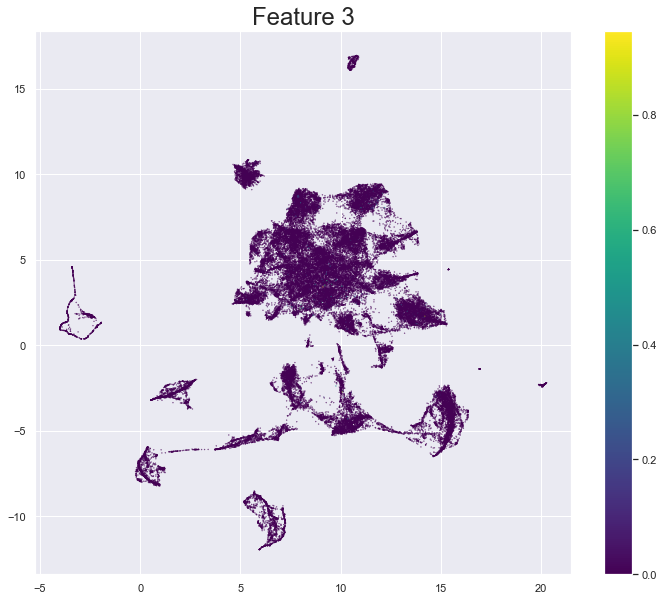

Number of nonzero cells 4090
Percentage of nonzero cells 7.386538079500099
Max coefficient 3.7805727
Average coefficient 0.040656094


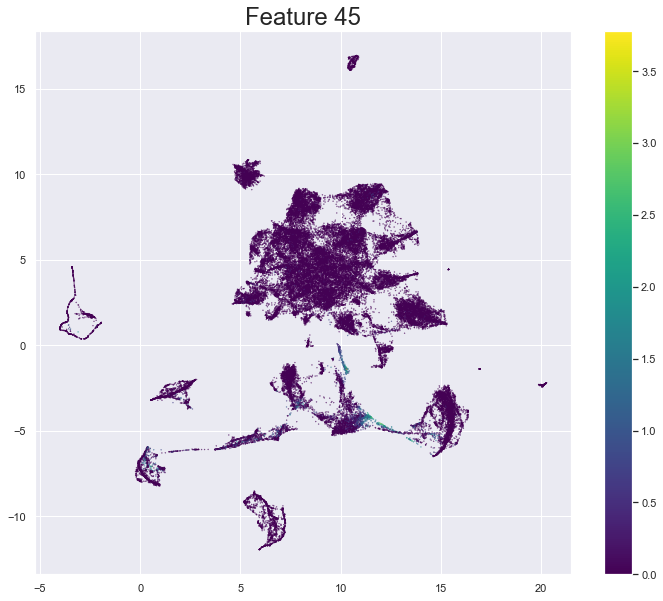

Number of nonzero cells 12287
Percentage of nonzero cells 22.19031623051778
Max coefficient 5.755305
Average coefficient 0.15652815


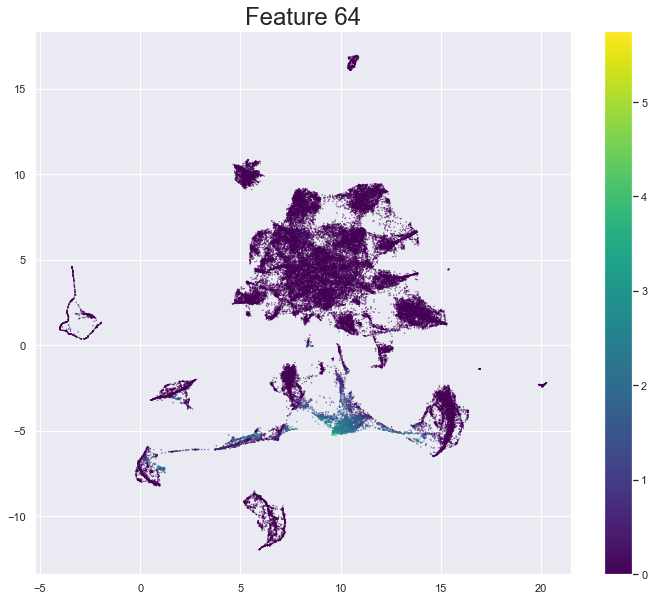

Number of nonzero cells 4497
Percentage of nonzero cells 8.121579888389228
Max coefficient 2.3785832
Average coefficient 0.051027104


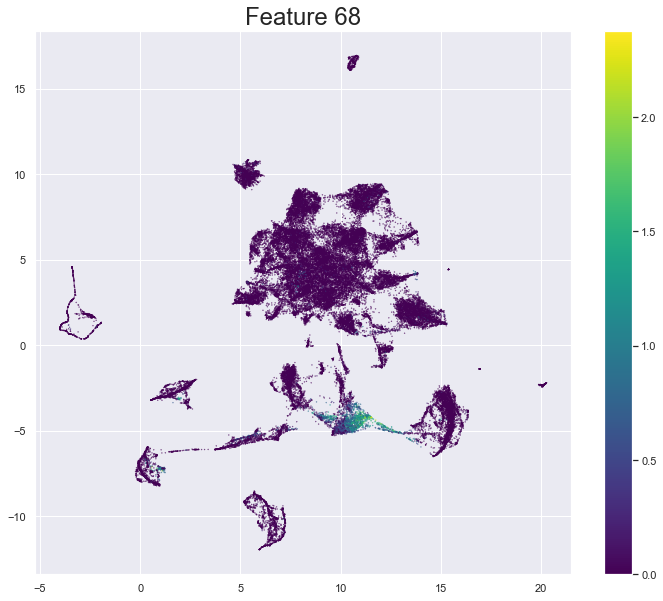

Number of nonzero cells 2985
Percentage of nonzero cells 5.390908598363764
Max coefficient 2.4432955
Average coefficient 0.026318455


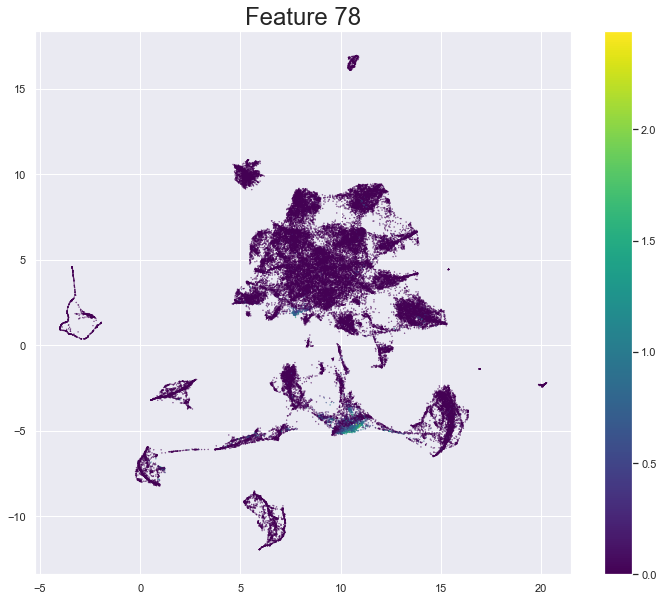

In [7]:
scProject.viz.featurePlots(dataset_filtered, [3, 45, 64, 68, 78], 'ARG99', 'UMAPARG99')

Features 3 and 78 clearly dropped out, which shows that while they may be expressed in astrocytes and radial glia they are not the core of the cell type as they are not as necessary in reconstructing the cell type as the other features that persisted. This is a perfect example of the model being forced to choose the most important features.

Lastly, lets up the regularization while keeping the lasso high to see what happens.

(55371, 80)
[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


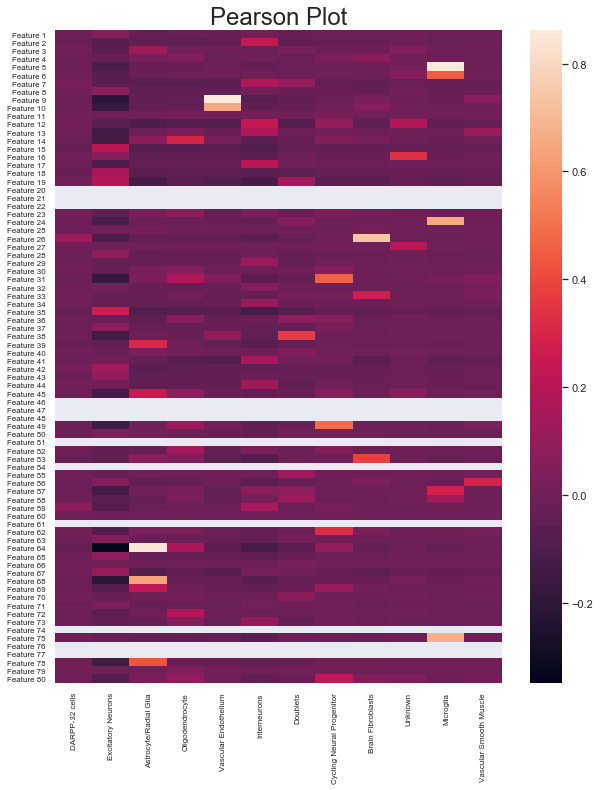

In [8]:
plt.rcParams['figure.figsize']= [10, 12]
scProject.rg.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'ARGHigh', .0025, .99)
scProject.viz.pearsonMatrix(dataset_filtered, patterns_filtered, 'CellType', 12, 'ARGHigh', 'PearsARGHigh', True, False)


[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


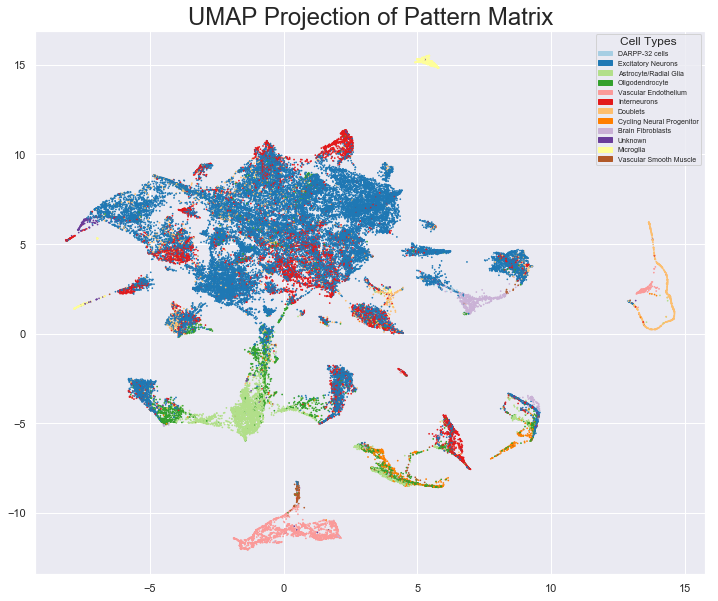

In [9]:
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.UMAP_Projection(dataset_filtered, 'CellType', 'ARGHigh', 'UMAPARGHigh', 20)

Number of nonzero cells 305
Percentage of nonzero cells 0.5508298567842372
Max coefficient 1.4405726
Average coefficient 0.0014397237


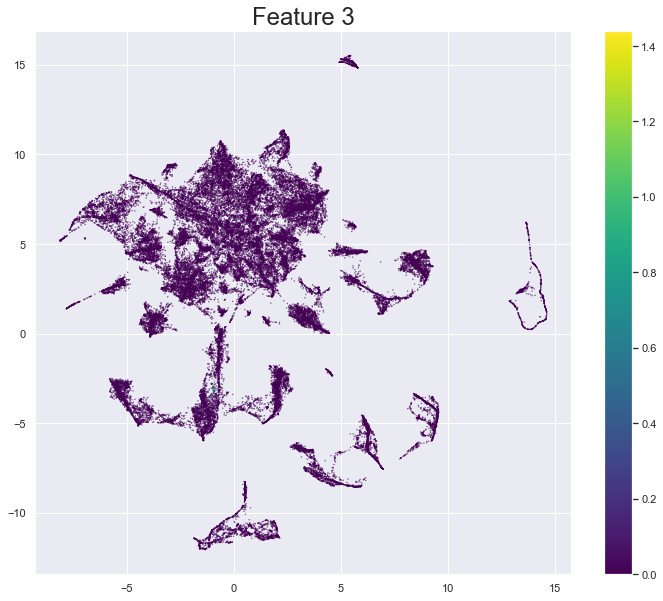

Number of nonzero cells 1117
Percentage of nonzero cells 2.0173014755016165
Max coefficient 3.1577318
Average coefficient 0.010821105


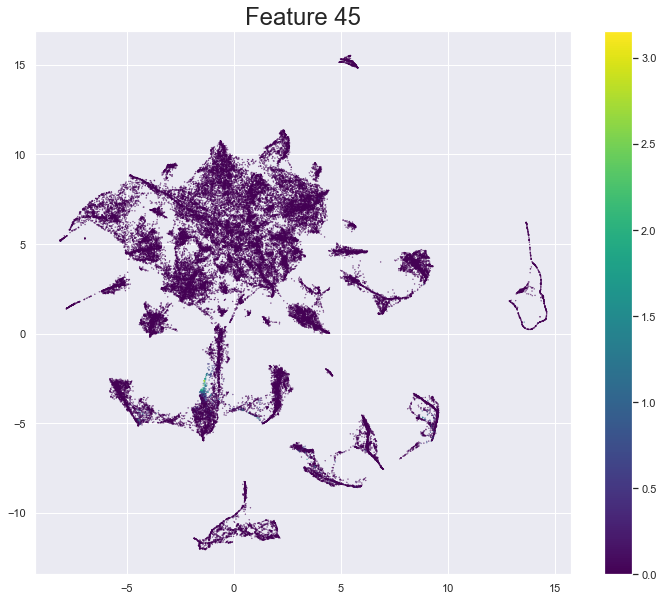

Number of nonzero cells 9700
Percentage of nonzero cells 17.518195445269182
Max coefficient 5.620137
Average coefficient 0.15169007


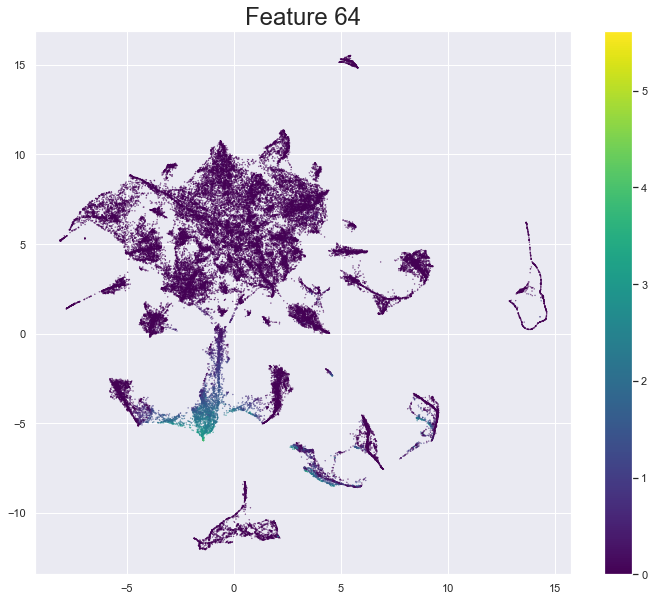

Number of nonzero cells 2286
Percentage of nonzero cells 4.12851492658612
Max coefficient 1.8369266
Average coefficient 0.02166698


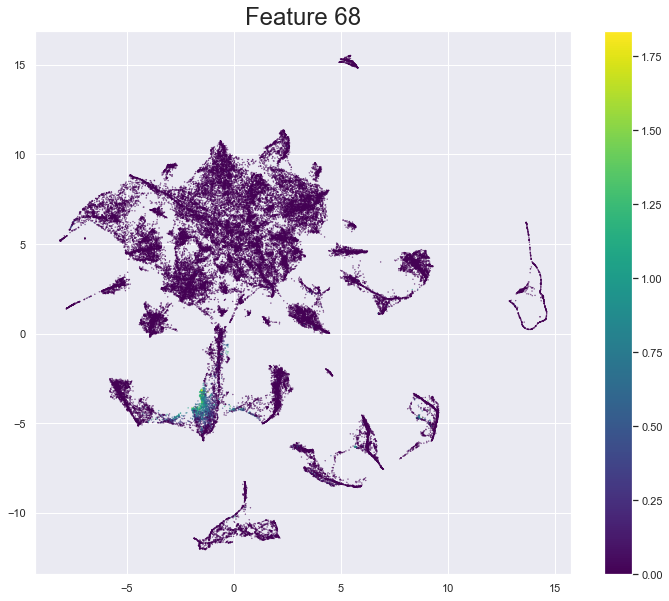

Number of nonzero cells 1550
Percentage of nonzero cells 2.799299272182189
Max coefficient 2.077239
Average coefficient 0.011688127


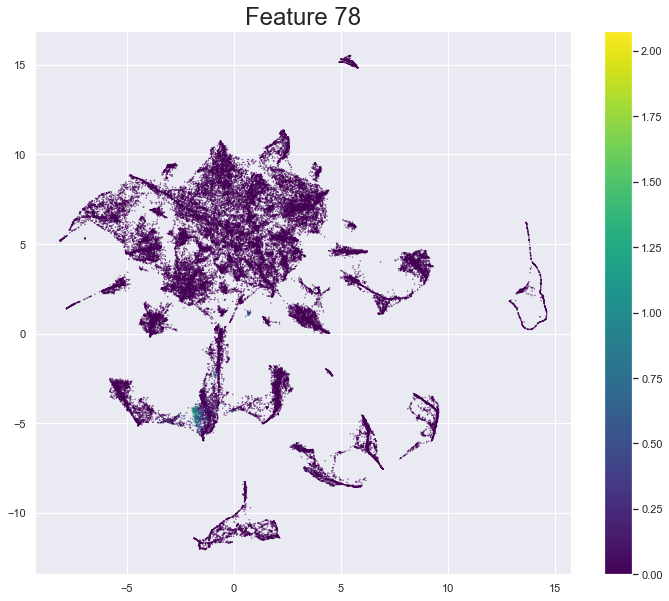

In [10]:
scProject.viz.featurePlots(dataset_filtered, [3, 45, 64, 68, 78], 'ARGHigh', 'UMAPARGHigh')

This clearly shows us that features 64 and 68 are the most robust markers of astrocytes/radial glia in the cortex. Lastly, let's check the highest expressed genes to understand the biology. Feature 45 plays a role so let's print those genes as well.

In [11]:
print(scProject.stats.importantGenes(patterns_filtered, 45, .1), "Feature 45 Genes")
print(scProject.stats.importantGenes(patterns_filtered, 64, .5), "Feature 64 Genes")
print(scProject.stats.importantGenes(patterns_filtered, 68, .3), "Feature 68 Genes")


[Index(['ENSMUSG00000026385', 'ENSMUSG00000027447', 'ENSMUSG00000092341'], dtype='object', name='index')] Feature 45 Genes
[Index(['ENSMUSG00000026385', 'ENSMUSG00000027447', 'ENSMUSG00000029838',
       'ENSMUSG00000000184', 'ENSMUSG00000000031'],
      dtype='object', name='index')] Feature 64 Genes
[Index(['ENSMUSG00000027447', 'ENSMUSG00000092341'], dtype='object', name='index')] Feature 68 Genes


These are ensemble ids so I just used https://www.syngoportal.org/convert.html to convert them to gene names.
#### Feature 45: 
ENSMUSG00000027447	cystatin C <br>
ENSMUSG00000026385	diazepam binding inhibitor <br>
ENSMUSG00000092341	metastasis associated lung adenocarcinoma transcript 1 (non-coding RNA) <br>
#### Feature 64:
ENSMUSG00000000184	cyclin D2<br>
ENSMUSG00000027447	cystatin C<br>
ENSMUSG00000026385	diazepam binding inhibitor<br>
ENSMUSG00000000031	H19, imprinted maternally expressed transcript<br>
ENSMUSG00000029838	pleiotrophin<br>
#### Feature 68:
ENSMUSG00000027447	cystatin C<br>
ENSMUSG00000092341	metastasis associated lung adenocarcinoma transcript 1 (non-coding RNA)<br>
It is worth noting that all three features have cystatin C which is known to be expressed in astrocytes. Also, Diazepam binding inhibitor is known to be expressed in astrocytes. These features make sense that they would be expressed in astrocytes. 
